# Recreating Hubble's Original Diagram

### Introduction

This project is part of the AST222 course at the University of Toronto.

In this data project, we worked with a very small catalogue of observed magnitudes and periods of Cepheid variable in order to plot the hubble diagram.

In [30]:
# First, load in some important packages
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

Now, let's load in our data:

In [31]:
# Next, load in the data
cepheid_periods = np.loadtxt("cepheid_periods.txt")
cepheid_magnitudes = np.loadtxt('cepheid_magnitudes.txt')
wavelengths = np.loadtxt('wavelengths.txt')

### Part A: Finding Distance

We have observed cepheid variables in ten assorted host galaxies. Given the periods and apparent magnitudes of these cepheids, we are to find the distances between our observer and each host galaxy by filling in your formula for distance. 

Note: Assume cepheids have an approximate period luminosity relationship of
$M = -3 \times (\log_{10}(period) - 1) - 4$ 
where period is given in units of days.

In [32]:
# Define a function to calculate cepheid distance from apparent magnitude and period
def cepheid_distance_finder(magnitude, period):
    '''
    Return the distance of a cepheid given its magnitude (in mag) and period (in days)
    '''
    # First, find the absolute magnitude M using the given period-luminosity relationship
    M = -3 * (np.log10(period) - 1) - 4
    
    # Next, from the distance modulus, find the distance of the cepheid. The distance will be in parsecs
    distance = 10 ** ((magnitude - M + 5)/5)
    
    # Return the result
    return distance

Now, we run this function on our lists of periods and aparent magnitudes to get distances.

In [33]:
# Plug in the data to find the cepheid distances
cepheid_distances = cepheid_distance_finder(cepheid_magnitudes, cepheid_periods)
cepheid_distances

array([ 4439990.10866325, 37684306.24503926,  3917336.53264988,
        2045676.28262137, 25054789.03266679, 10791409.93115591,
        9442587.35665416,  3170627.81043777, 16722819.83473978,
        4262183.28338262])

### Part B: Finding Velocity

The 21 cm emission lines are easily recognizable emission lines that have been detected from all of these listed galaxies. When a 21 cm photon would be emitted or absorbed, its wavelength would be about 0.21106114 m (hence 21cm!). We have provided the wavelength at which this line was observed on earth. Using this, we are to calculate the recessional velocity of each galaxy.

In [34]:
# Define a function to calculate the galaxy recessional velocity using the observed wavelength of its 21 cm line
def velocity_21cm(wavelength):
    '''
    Return the galaxy recessional velocity given its observed wavelength (in m)
    '''
    # Define some constants. Here, the rest_wavelength is in meters and the speed of light c is in m/s
    rest_wavelength = 0.21106114
    c = 3 * 10**8
    
    # Find the galaxy recessional velocity
    velocity = c * (wavelength - rest_wavelength)/rest_wavelength
    
    # Return the result. If the velocity is positive, it means that the spectrum is redshifted and the galaxy travels away from
    # the observer. If the velocity is negative, it means that the spectrum is blueshifted and the galaxy travels towards the
    # observer. The velocity will be in m/s
    return velocity

In [35]:
# Plug in the data to find recessional velocity
recessional_velocities = velocity_21cm(wavelengths)
recessional_velocities

array([ 547490.64654913, 1905599.48648054,  321290.78806262,
        143986.71399197, 1637099.08891803,  717588.27797481,
        922495.72801512,  133496.86256788,  635389.34737109,
        513292.02523969])

### Part C: Creating The Plot

Now that we have the distances and recessional velocities, let’s find Hubble’s Constant! Plot the distances and recessional velocities. Fit a line whose slope will determine $H_0$ in units of km Mpc$^{-1}$ s$^{-1}$.

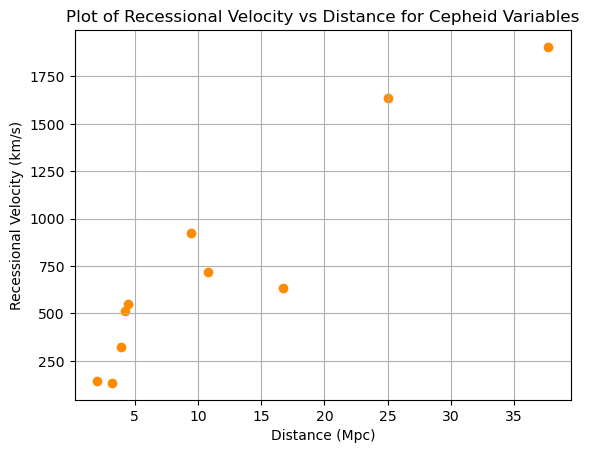

In [36]:
# Convert the distance from parsecs to megaparsecs
cepheid_distances = cepheid_distances * 10**(-6)

# Convert the recessional velocity from m/s to km/s
recessional_velocities = recessional_velocities * 10**(-3)

# Create a scatter plot of the recessional velocities against the distances
plt.scatter(cepheid_distances, recessional_velocities, color = 'darkorange')

# Add x-label, y-label, and title
plt.xlabel('Distance (Mpc)')
plt.ylabel('Recessional Velocity (km/s)')
plt.title('Plot of Recessional Velocity vs Distance for Cepheid Variables')

plt.grid(True)
plt.show()

Now, let's fit a line through our datapoints. 

In [37]:
## Define a function to calculate recessional velocity using the Hubble equation
def velocity_hubble_equation(distance, Ho):
    '''
    Return the recessional velocity given the distance (in Mpc) and Hubble constant Ho (in km/s/Mpc) using the Hubble equation
    '''
    # Using the Hubble equation
    velocity = distance * Ho
    
    # Return the result. The result will be in km/s
    return velocity

In [38]:
# Fit the hubble constant
# Covariance gives a measure of how good your fit is.
Ho, covariance = curve_fit(velocity_hubble_equation, cepheid_distances, recessional_velocities)
covariance

array([[22.7641232]])

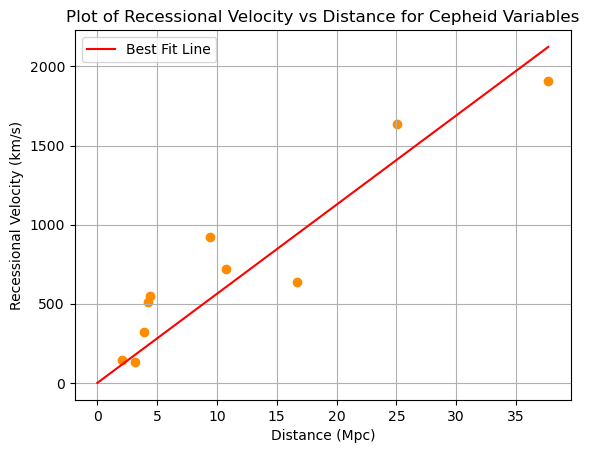

In [39]:
# Create a variable d representing some distance points. Using the np.linspace command, get 1000 numbers, evenly spaced, 
# from 0 to the maximum value of the cepheid_distances. These distance points will be plugged into the best fit Hubble 
# equation to get a nice plot
d = np.linspace(0, np.max(cepheid_distances), 1000) 

# Next, plot the fit Hubble equation
plt.plot(d, velocity_hubble_equation(d, Ho), color = 'red', label = 'Best Fit Line')
plt.scatter(cepheid_distances, recessional_velocities, color = 'darkorange')

# Add x-label, y-label, and title
plt.xlabel('Distance (Mpc)')
plt.ylabel('Recessional Velocity (km/s)')
plt.title('Plot of Recessional Velocity vs Distance for Cepheid Variables')

plt.grid(True)
plt.legend()
plt.show()

### Part D: Calculating New Galaxy's Distance

Using our newly calculated hubble constant, estimate the distance to a galaxy for which we observe the 21 cm line at a wavelength of 0.21178817 m.

In [40]:
# The observed wavelength
new_galaxy_21cm = 0.21178817

# Plug in the wavelength of the new galaxy, which is new_galaxy_21cm, into the velocity_21cm formula to get the
# recessional velocity. The result should be in m/s
new_galaxy_velocity = velocity_21cm(new_galaxy_21cm)

# Now, we know the recessional velocity of the new galaxy. We also have the Hubble constant, Ho, from fitting the curve
# Next, using Hubble equation, we can derive the distance of the new galaxy. The Hubble constant is already in km/s/Mpc
# Meanwhile, the velocity of the galaxy is still in m/s, so we have to convert it to km/s during the calculation
new_galaxy_distance = (new_galaxy_velocity * 10**(-3))/Ho

# Print the result
print('For a galaxy whose 21 cm line is observed at a wavelength of {} m, we calculated its recessional velocity to be around \
{:.3} m/s. Then, using the Hubble equation with a constant Hubble Ho equals to {:.4}, we estimated the distance of the galaxy to be \
{:.4} Mpc'.format(new_galaxy_21cm, new_galaxy_velocity, Ho[0], new_galaxy_distance[0]))

For a galaxy whose 21 cm line is observed at a wavelength of 0.21178817 m, we calculated its recessional velocity to be around 1.03e+06 m/s. Then, using the Hubble equation with a constant Hubble Ho equals to 56.33, we estimated the distance of the galaxy to be 18.34 Mpc
